In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from pyod.models.knn import KNN
%run Data_manipulation.ipynb

In [17]:
#KNN

def detect_anomalies_knn(df, n_neighbors=10, contamination=0.1):
    """
    Detect anomalies in a time series using k-Nearest Neighbors (KNN).

    Parameters:
    - df: DataFrame containing the time series data with a 'Close' column.
    - n_neighbors: Number of neighbors to use for KNN.
    - contamination: The proportion of anomalies in the data set.

    Returns:
    - anomalies: DataFrame containing the detected anomalies.
    """
    # Selecting the 'Close' column for anomaly detection
    data = df['Close'].values.reshape(-1, 1)

    # Initialize k-Nearest Neighbors
    knn = KNN(n_neighbors=n_neighbors, contamination=contamination)

    # Fit the model and predict anomalies
    knn.fit(data)
    anomaly_labels = knn.labels_  # Binary labels (0: inliers, 1: outliers)
    
    # Anomalies are labeled as 1
    anomalies = df[anomaly_labels == 1]

    # Plot the time series data
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.scatter(anomalies.index, anomalies['Close'], color='red', label='Anomaly')
    plt.title('Time Series Data with Anomalies Detected using KNN')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    return anomalies


# NIFTY

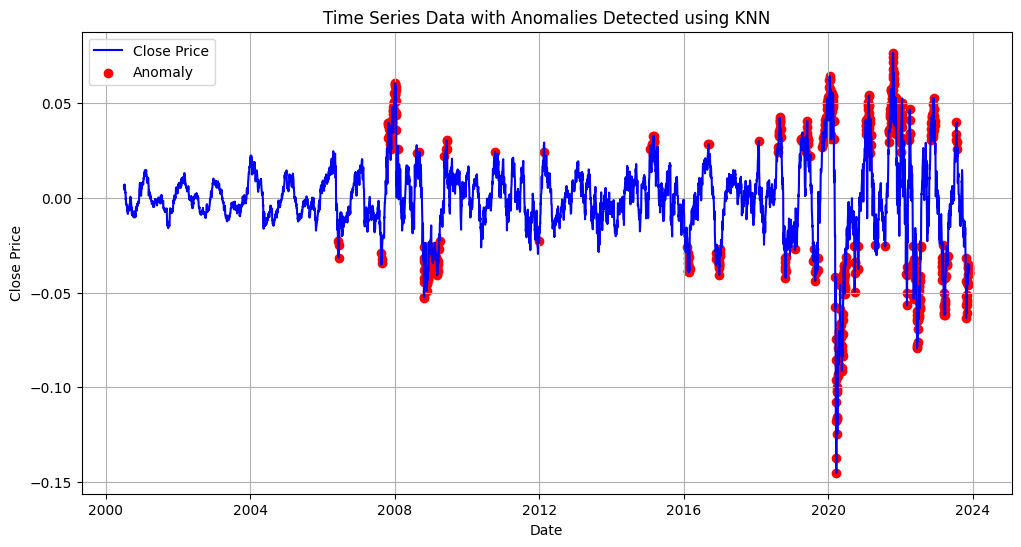

In [20]:
NIFTY = pd.read_csv('D:/UFG/Data collection/NIFTY.csv')
NIFTY['Date']= pd.to_datetime(NIFTY['Date'], format='%Y-%m-%d')
#NIFTY.set_index('Date', inplace=True)

scaled_data, scaler = scale_data(NIFTY)
df_residuals, df_trend, df_seasonal, decomposition_results = transform_to_stationary(scaled_data)

anomalies = detect_anomalies_knn(df_residuals)

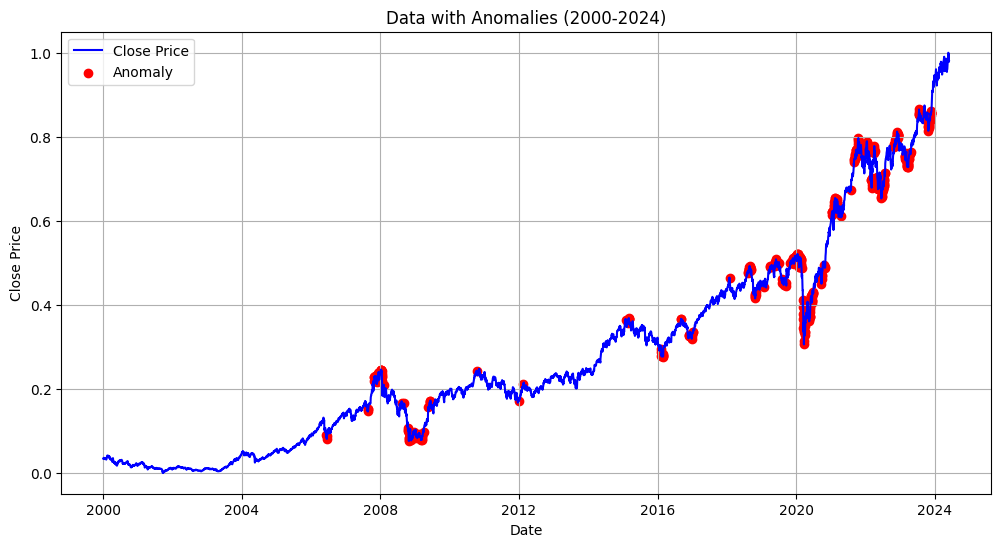

In [21]:
NIFTY_all = plot_with_anomalies(scaled_data, anomalies, 25)

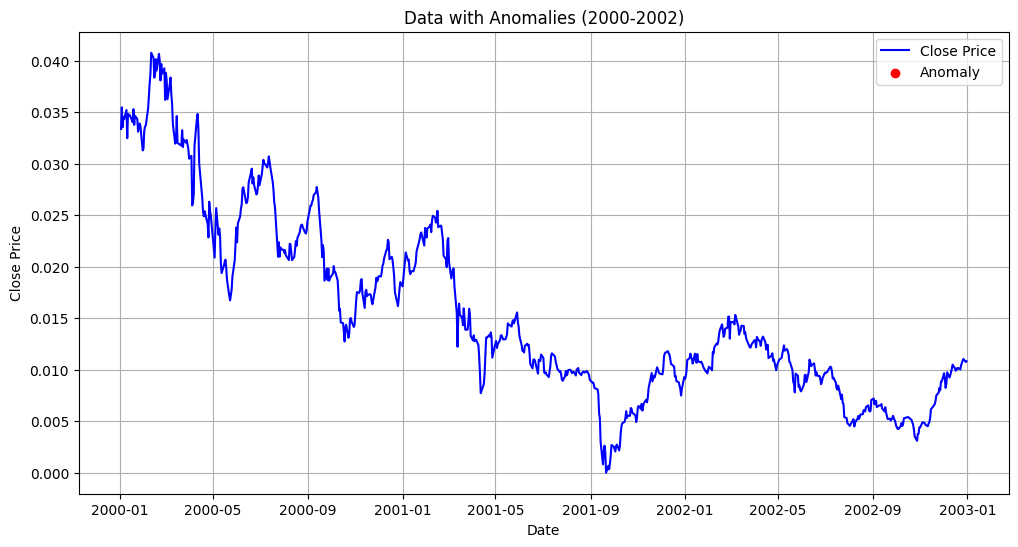

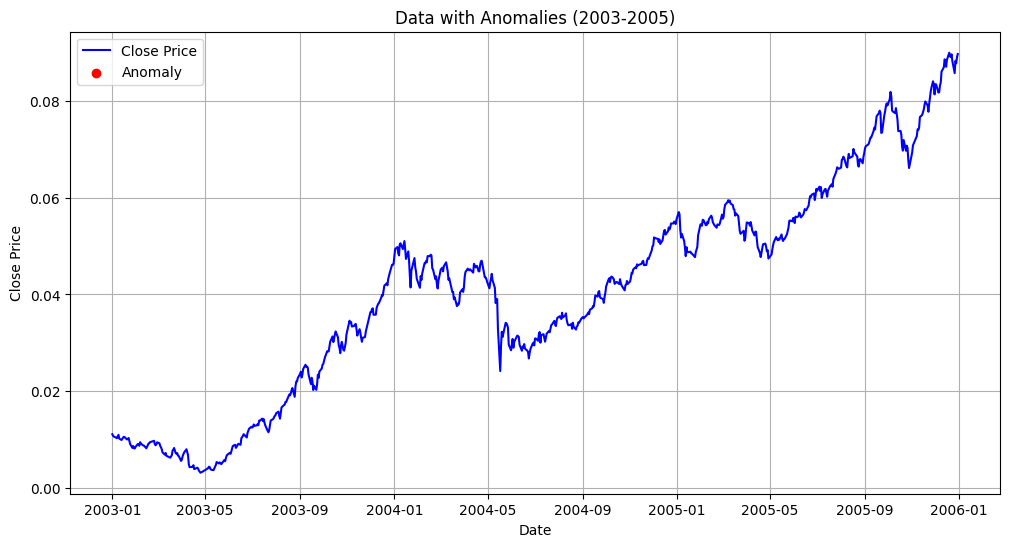

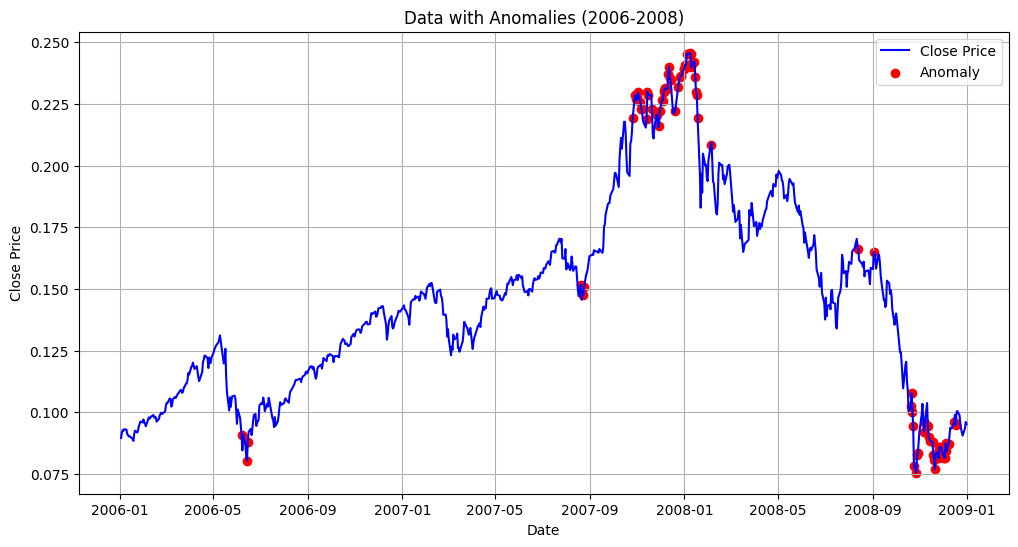

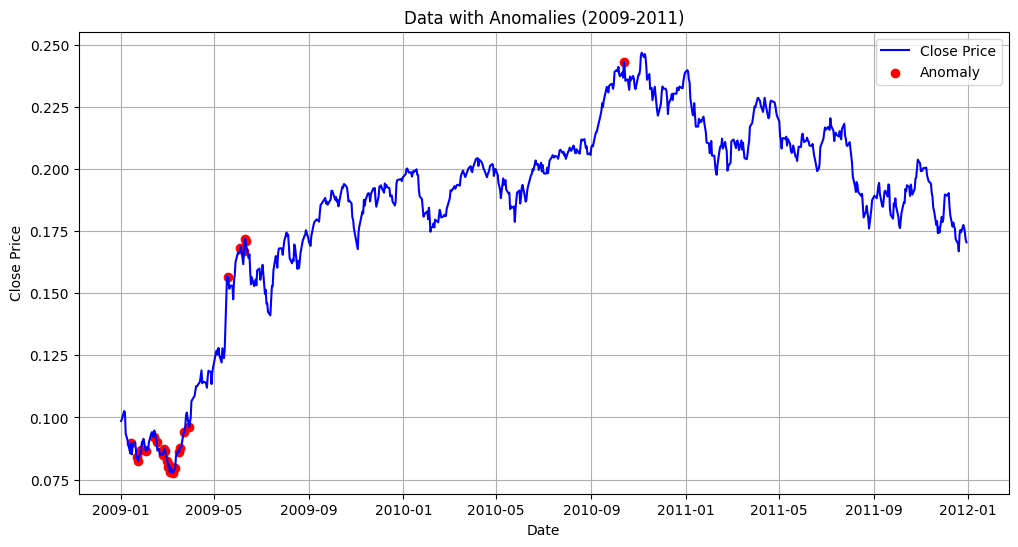

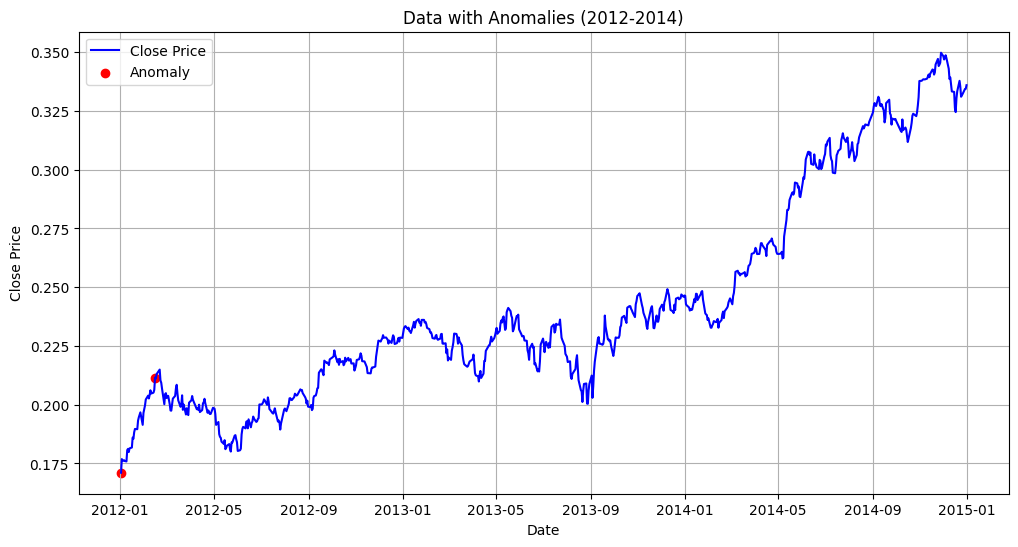

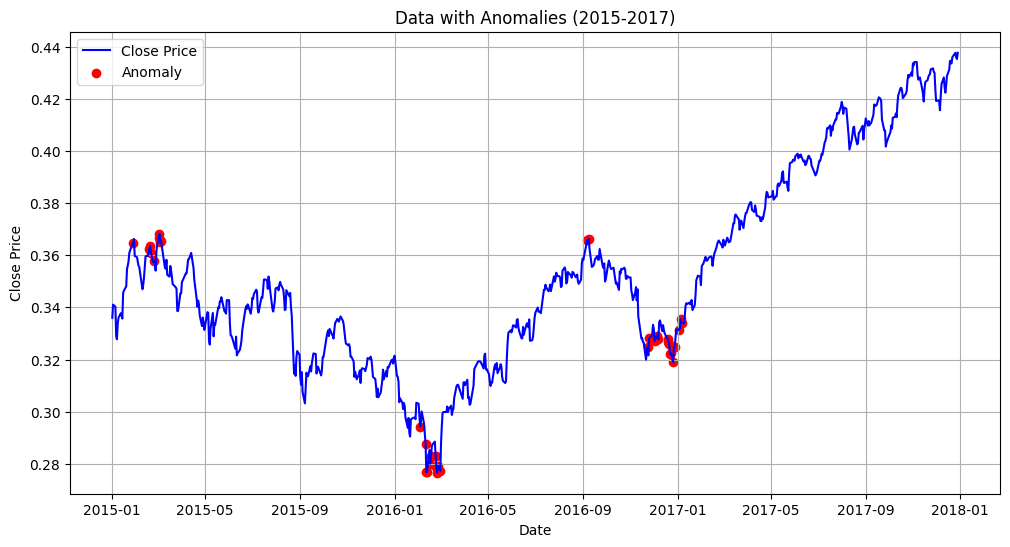

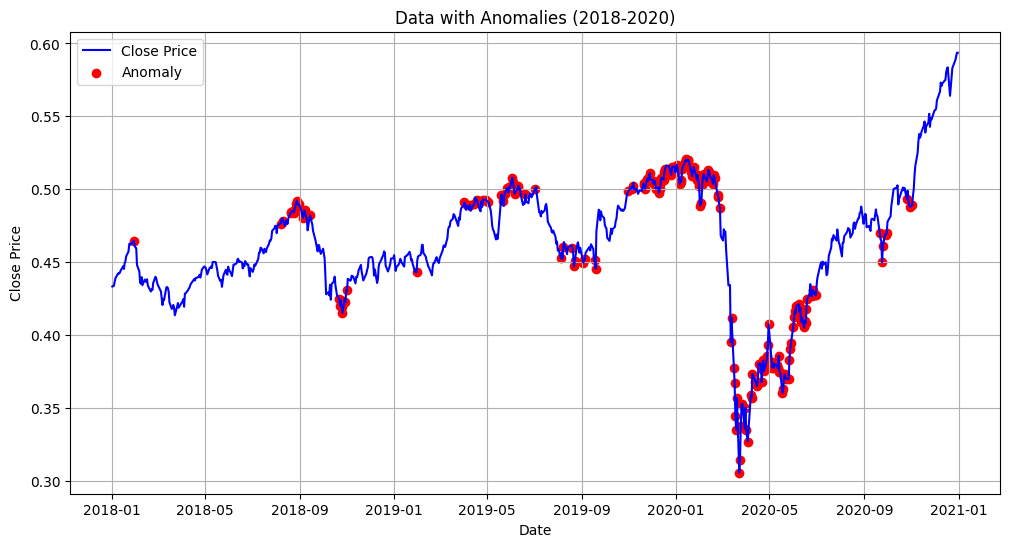

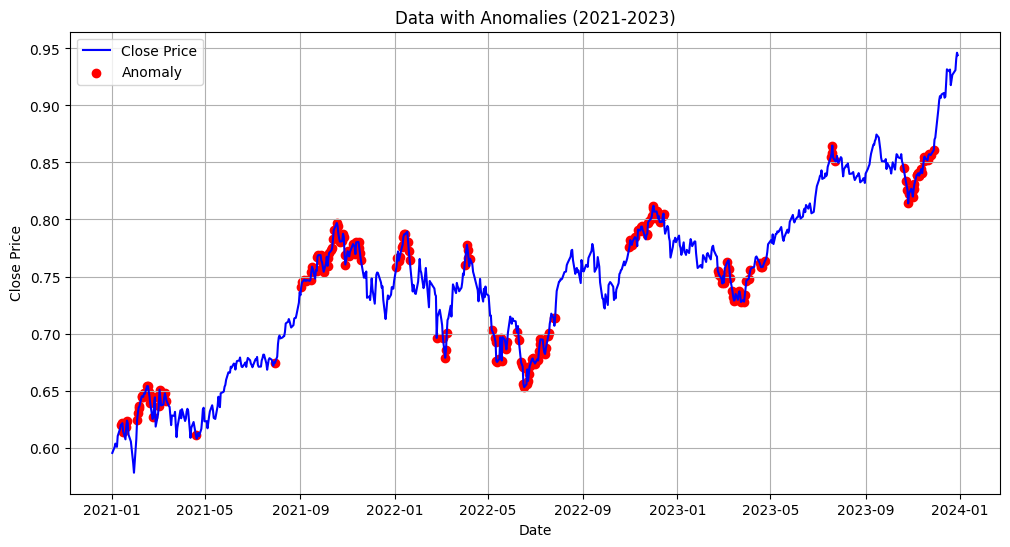

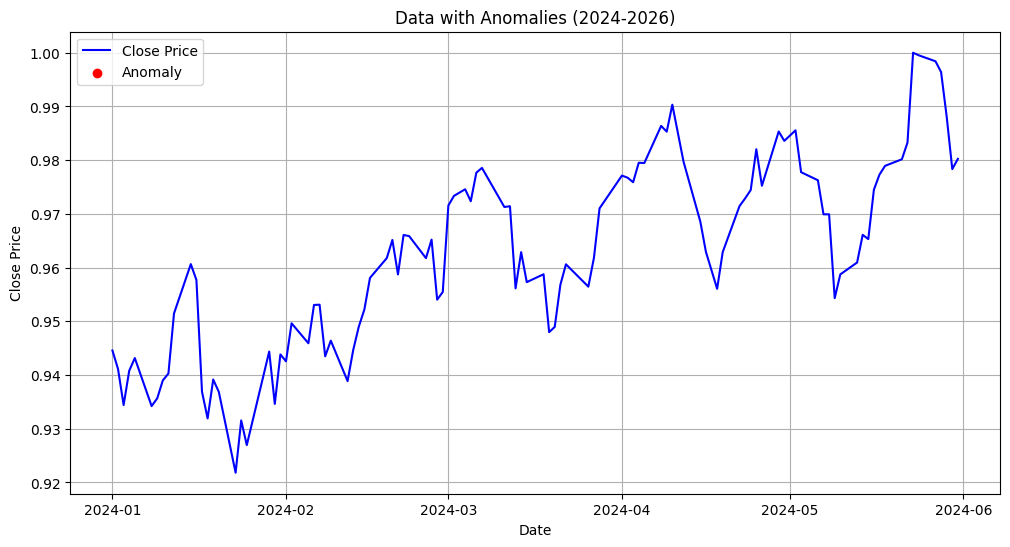

In [22]:
NIFTY_3 = plot_with_anomalies(scaled_data, anomalies, 3)

# IBOVESPA

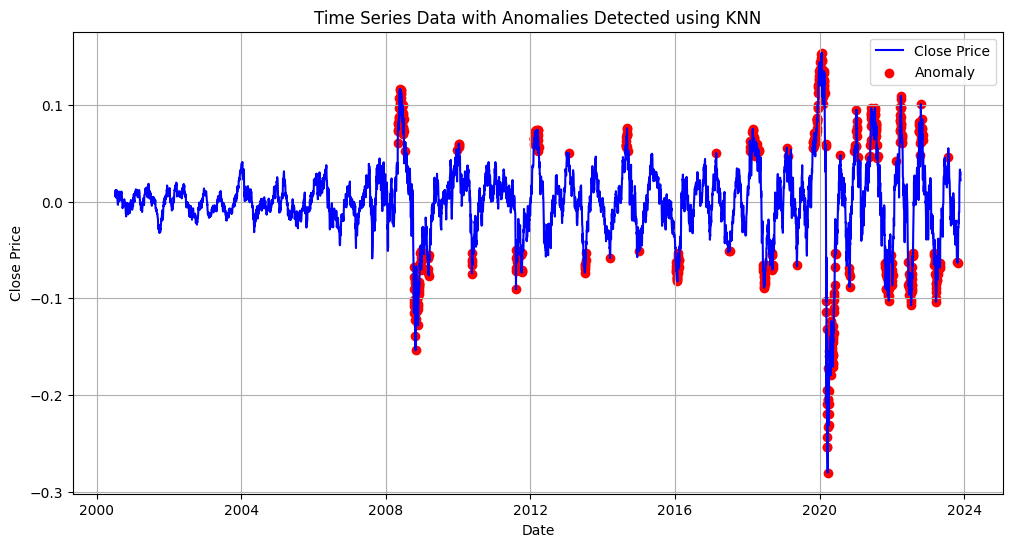

In [24]:
# Detecting anomaly
IBOV = pd.read_csv('D:/UFG/Data collection/IBOV.csv')
IBOV['Date']= pd.to_datetime(IBOV['Date'], format='%Y-%m-%d')

scaled_data, scaler = scale_data(IBOV)
df_residuals, df_trend, df_seasonal, decomposition_results = transform_to_stationary(scaled_data)

# Detect anomalies
anomalies = detect_anomalies_knn(df_residuals)


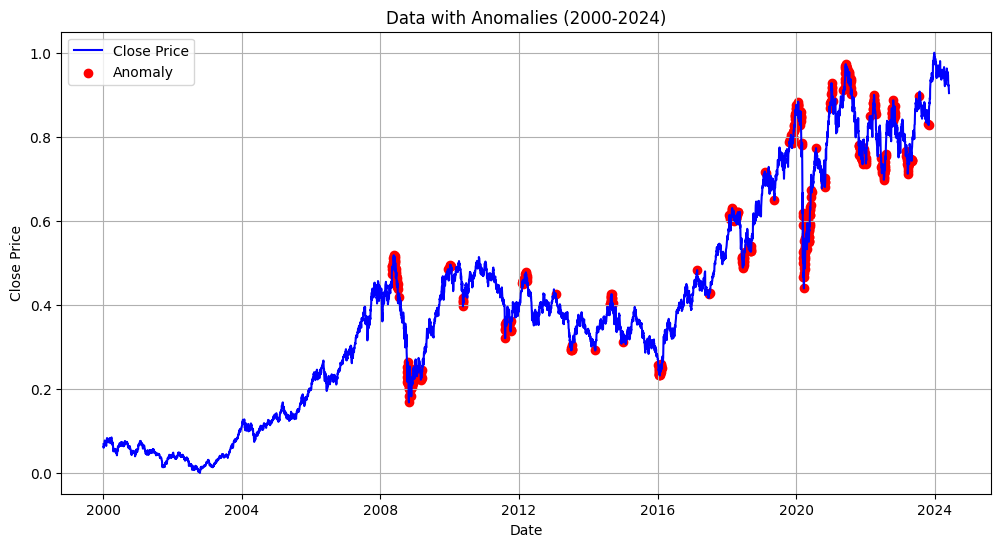

In [25]:
IBOV_all = plot_with_anomalies(scaled_data, anomalies, 25)

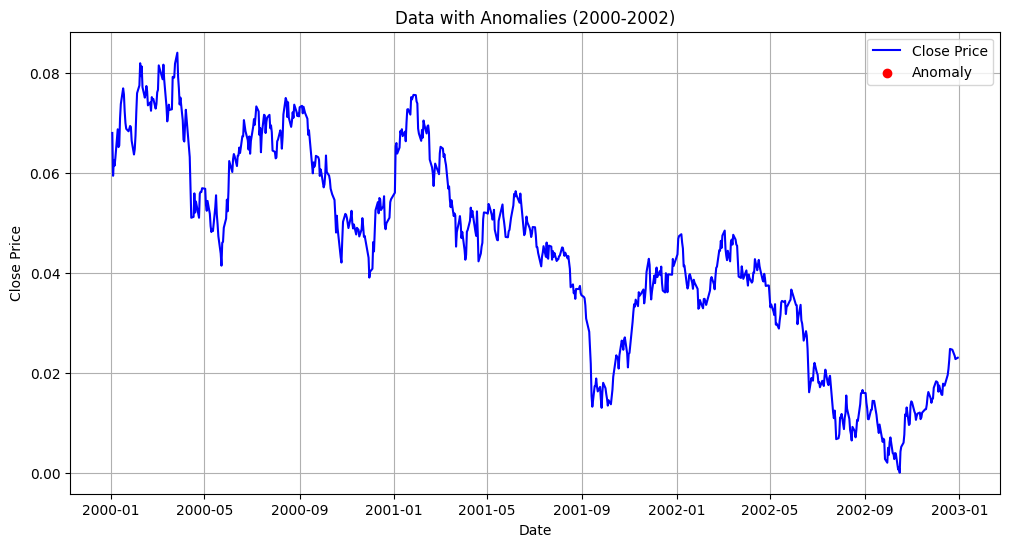

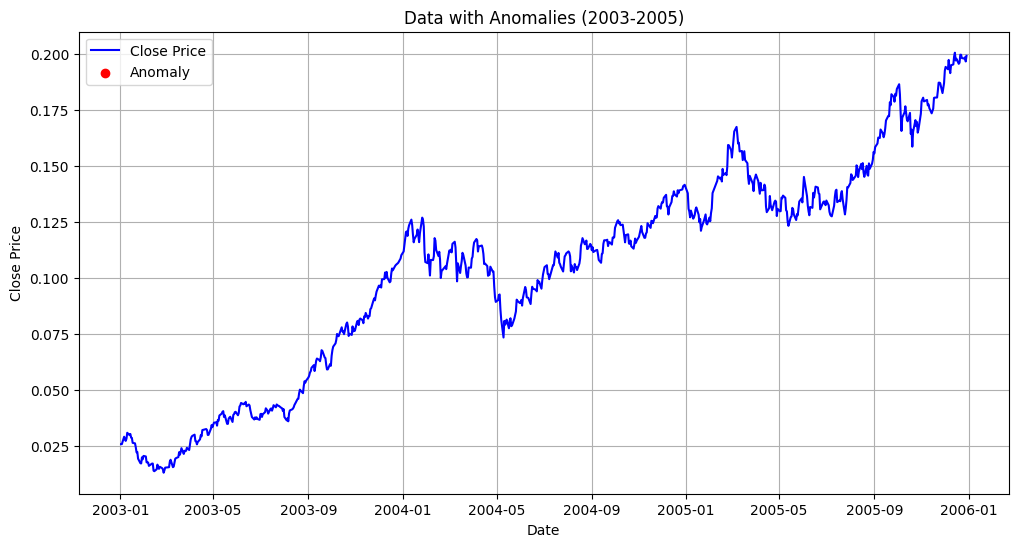

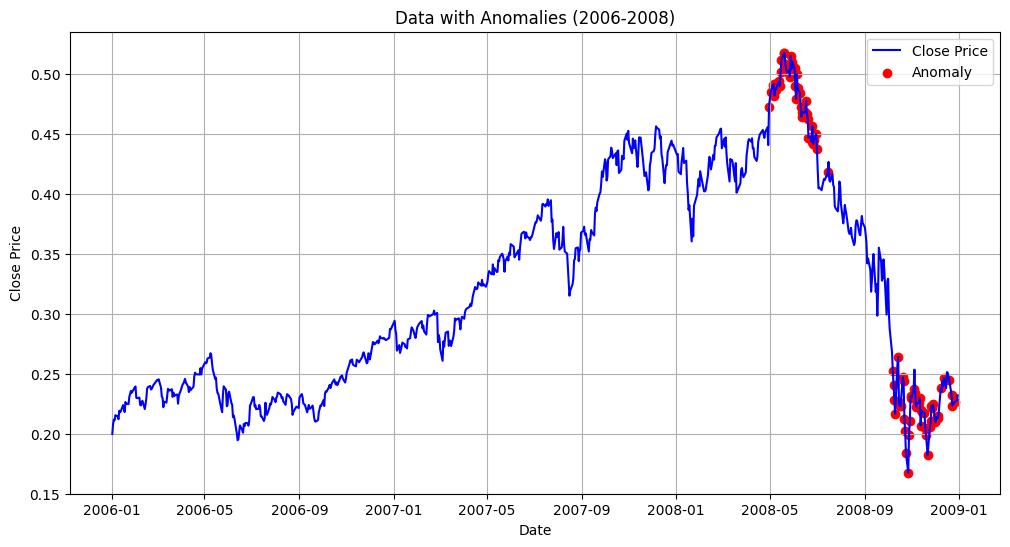

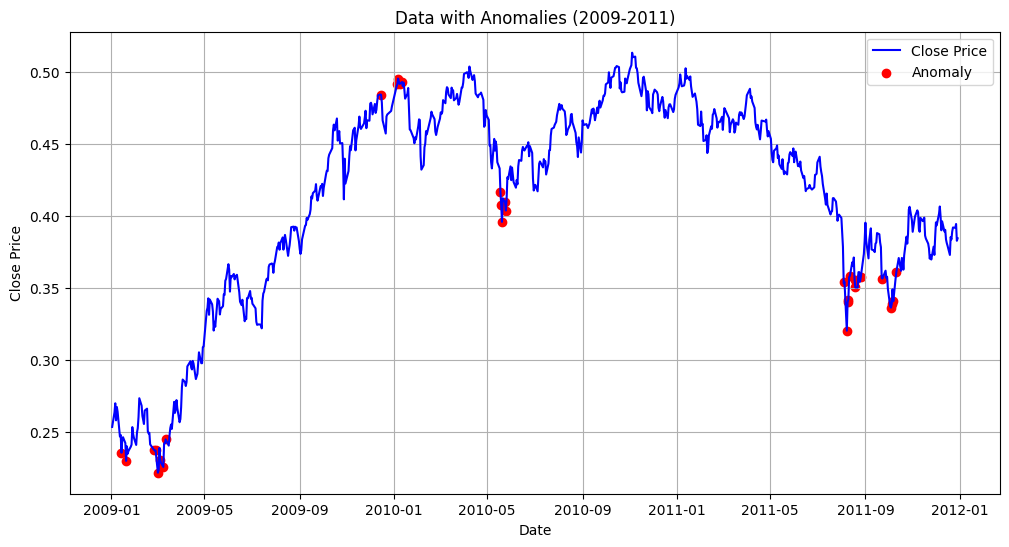

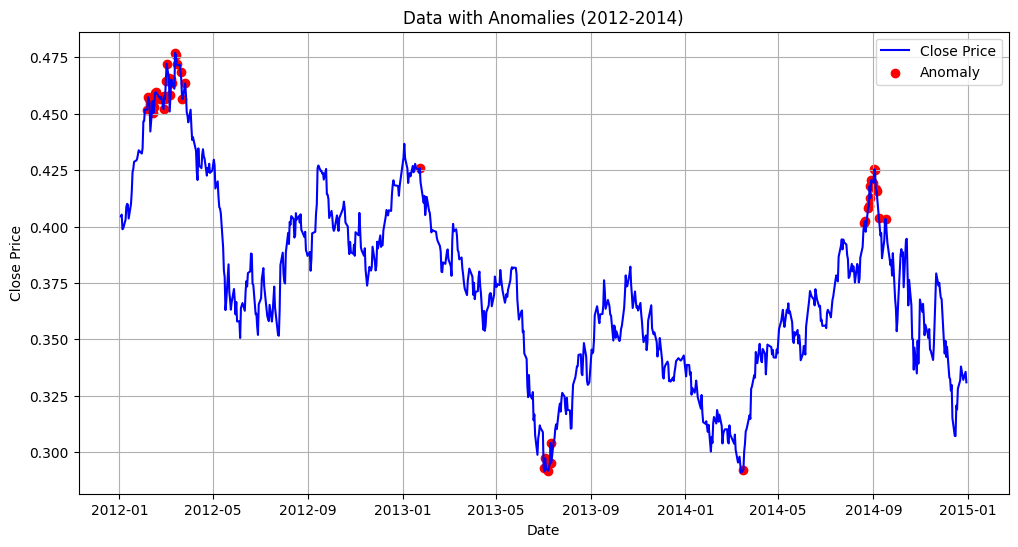

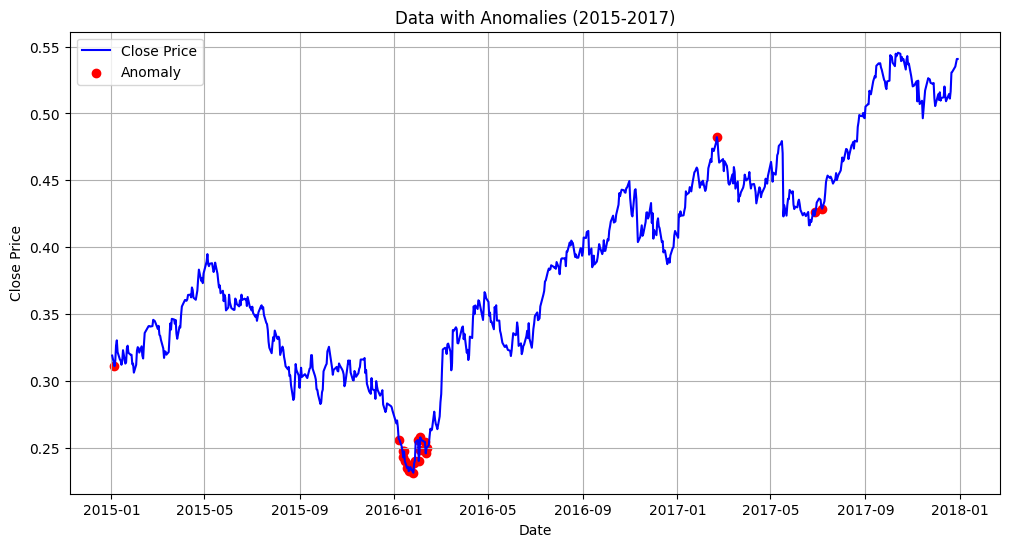

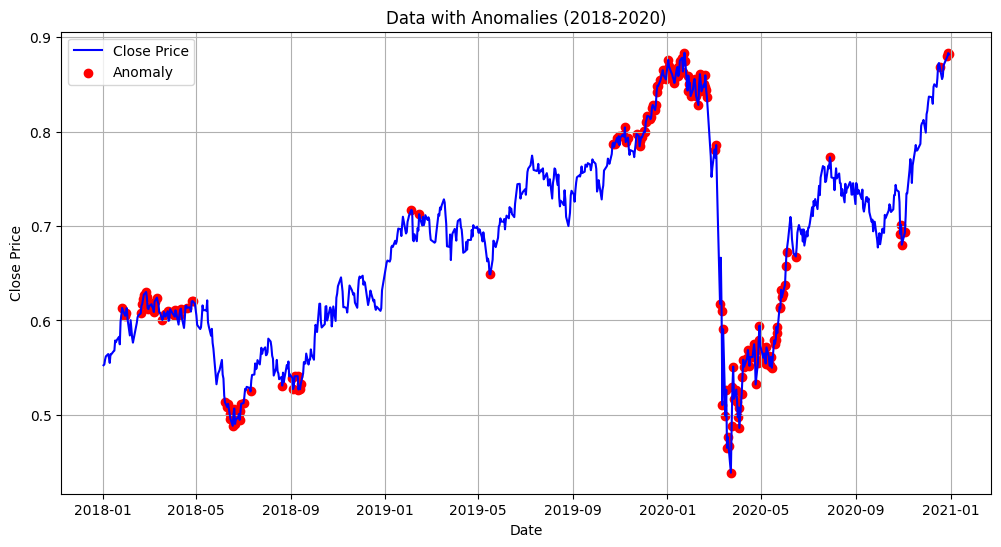

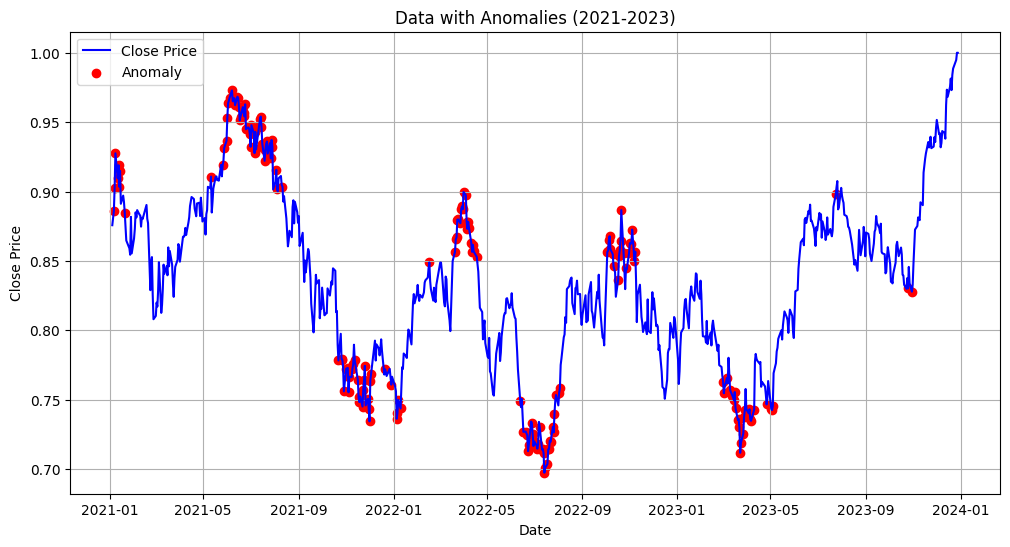

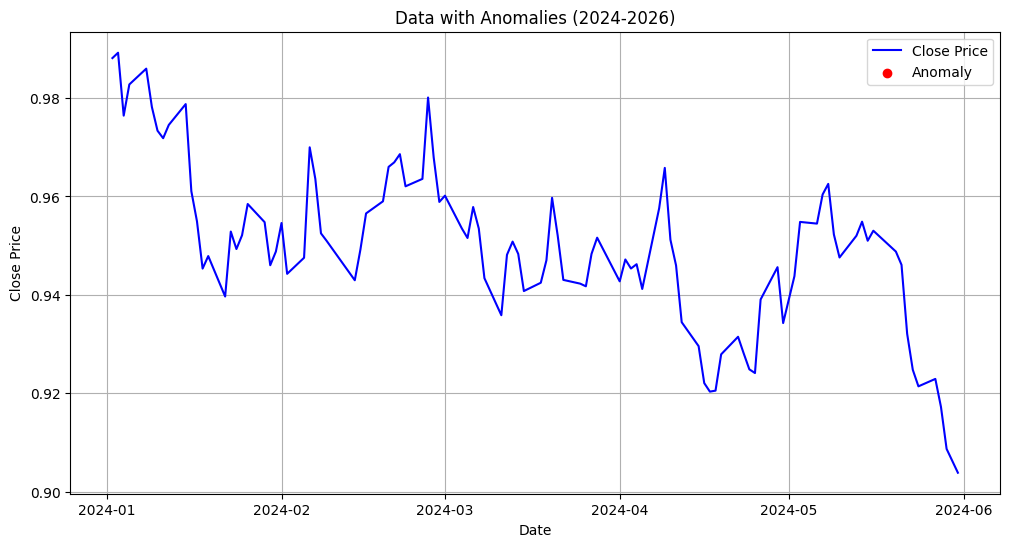

In [26]:
IBOV_3 = plot_with_anomalies(scaled_data, anomalies, 3)